In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.gridspec as gridspec  # for unequal plot boxes

%matplotlib inline

import lax 
from lax.lichens import sciencerun1
from pax import units
import hax
hax.init(pax_version_policy='6.10.1')
         #minitree_paths=['.', '/project2/lgrandi/xenon1t/minitrees/pax_v6.8.0'])

/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/seaborn-0.8.1-py3.4.egg/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [2]:
datasets = hax.runs.datasets
datasets = hax.runs.tags_selection(datasets, include=['cathode_-5kV', 'cathode_-5kv'],
                                   exclude=['bad', 'messy', 'test', '*lash*', 'source_opening'])

datasets = datasets[datasets['source__type'] == 'Kr83m']

# Select only runs of an hour or more
datasets['run_time_s'] = pd.to_timedelta((datasets.end) - pd.to_datetime(datasets.start)).dt.seconds
datasets = datasets[datasets.run_time_s > 3600]

# Only select runs in a particular date-range (date MM/DD/YY)
datasets = datasets[(datasets.start > pd.to_datetime('06/10/18', format = '%d/%m/%y')) &
              (datasets.end < pd.to_datetime('16/10/18',format = '%d/%m/%y'))] # only newer runs

# datasets
print('Selected %d datasets' % len(datasets))
#print('\nThe total runtime (days): ' ,datasets.run_time_s.sum()/(60*60*24))
#print('\n', hax.runs.count_tags(datasets), '\n')

Selected 22 datasets


In [3]:
# minitrees
data = hax.minitrees.load(datasets.name, ['CorrectedDoubleS1Scatter', 'Basics'])
no_cuts_data = data
#print('\n', data.columns.values)

In [4]:
# Reject bkg events from pileup
data = data[(data['s1_b_center_time']-data['s1_a_center_time'] > 100) &
           (data['s1_b_center_time']-data['s1_a_center_time'] < 2000)]
# Reject afterpulses events
data = data[(data['ds_s1_b_n_distinct_channels']>3) & 
           (data['ds_s1_b_n_distinct_channels']<30)]
# fiducial volume
data = hax.cuts.selection(data, data['int_a_z_pax'] > -96.6) 
data = hax.cuts.selection(data, data['int_a_z_pax'] < -1)

Unnamed selection: 512 rows removed (96.03% passed)
Unnamed selection: 987 rows removed (92.03% passed)


/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/hax-2.5.0-py3.4.egg/hax/cuts.py:130: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  d.cut_history = prev_cuts + [passthrough_dict]


  0%|          | 0/11398 [00:00<?, ?it/s]/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████| 11398/11398 [08:48<00:00, 21.55it/s]
/project/lgrandi/anaconda3/envs/pax_head/lib/python3.4/site-packages/matplotlib/colors.py:927: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


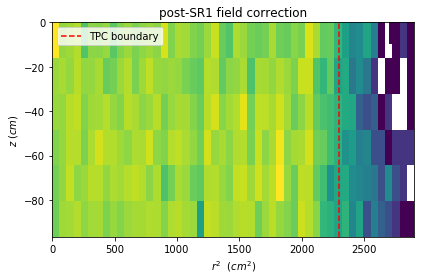

98        25.279384
123        5.283856
347       45.469922
378       29.291166
403       42.772371
494       22.818670
564       33.765110
575       25.207544
590       38.912870
632       27.050517
640       23.568391
672       48.770369
775       33.536233
810       35.671325
872       28.287621
1038       9.768074
1160      30.169478
1245      25.244947
1362      35.766433
1440      21.272266
1642      33.140682
1665      45.184981
1710      30.109221
1716      24.629881
1746      20.138634
1791      20.715905
1797      35.314847
1816      40.880965
1872      22.474342
1906      22.787401
            ...    
566198    24.049953
566289    36.016065
566330    37.584097
566352    19.681884
566396    39.945830
566447    39.645651
566521    23.467395
566586    42.263000
566631    26.272076
566636    27.120868
566690    19.338757
566754    11.284858
566790    31.812432
566820    36.279965
566826    28.233102
566853    21.437701
566882    26.268921
566896    28.137897
566919    45.283706


In [5]:
# Field correction
%run '/home/gvolta/Desktop/Function/Field_Correction/Field_Correction.ipynb'
FielCorrection(data, 'int_a_r_nn', 'int_a_z_pax', '/home/gvolta/Desktop/')

In [ ]:
data[]